# 🧪 Workshop - Rasterization from Zero: Drawing with Classical Algorithms

## 🔧 Step-by-step activities

#### ✅ 1. Prepare the drawing environment

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

width, height = 200, 200
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

#### ✅ 2. Drawing a line with the Bresenham algorithm

### 🟦 Bresenham algorithm
This algorithm allows to draw a straight line between two points using only integer operations. Very efficient for graphics on pixel displays.

In [2]:
# Bresenham’s Line Drawing Algorithm
# Draws a straight line using only integer operations for efficiency
# Parameters: starting point (x0, y0), ending point (x1, y1)
def bresenham(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        pixels[x0, y0] = (255, 0, 0)
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

##### Test ☝

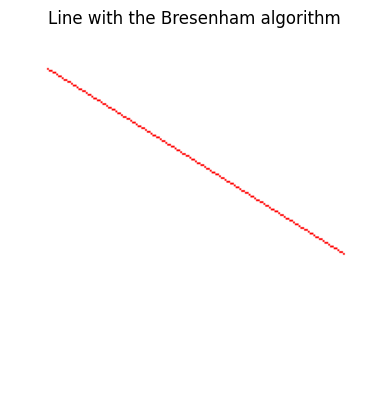

In [3]:
bresenham(20, 20, 180, 120)
# Display the image
plt.imshow(image)
plt.title("Line with the Bresenham algorithm")
plt.axis('off')
plt.show()

##### We clean the image for the following algorithms

In [4]:
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

#### ✅ 3. Draw a circle with the midpoint algorithm.

### 🟣 Midpoint algorithm

Optimized algorithm that takes advantage of the symmetry of a circle to draw it only by calculating 1/8 of its points.

In [5]:
# Midpoint Circle Algorithm
# Efficiently plots a circle by exploiting 8-way symmetry
# Parameters: center of circle (x0, y0), radius
def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius

    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixels[x0 + dx, y0 + dy] = (0, 0, 255)
        y += 1
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1

##### Test ☝

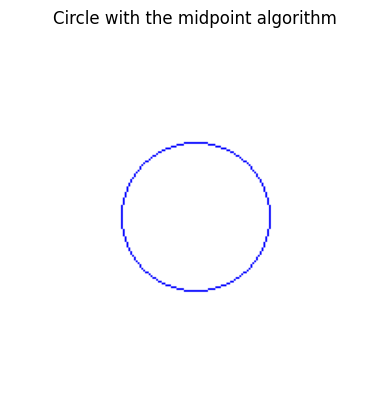

In [6]:
midpoint_circle(100, 100, 40)
# Mostrar la imagen
plt.imshow(image)
plt.title("Circle with the midpoint algorithm")
plt.axis('off')
plt.show()

##### We clean the image for the following algorithms

In [7]:
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

#### ✅ 4. Filling a triangle (simple rasterization by scanline)

### 🟩 Rasterization by Scanline (Triangle)
It allows to fill a triangle by scanning line by line (scanlines) and calculating intersections with its edges.

In [8]:
# Scanline Triangle Rasterization
# Fills a triangle by interpolating edges and coloring horizontal spans
# Parameters: three triangle vertices p1, p2, p3
def fill_triangle(p1, p2, p3):
    # sort by y
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0: return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x12 + x23
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0)

##### Test ☝

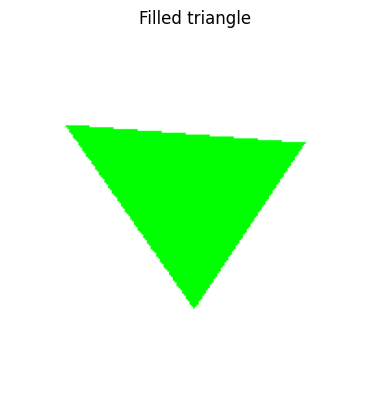

In [9]:
fill_triangle((30, 50), (100, 150), (160, 60))
# Display the image
plt.imshow(image)
plt.title("Filled triangle")
plt.axis('off')
plt.show()

##### We clean the image for the following algorithms

In [10]:
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

#### ✅ 5. Show the result (applying all methods on the same image)


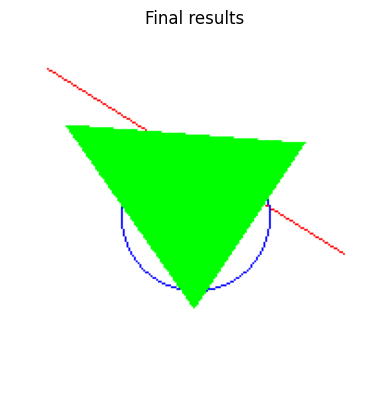

In [11]:
# Call all drawing functions on the same image canvas
# 1. Draw a red line using Bresenham
# 2. Draw a blue circle using the midpoint method
# 3. Fill a green triangle using scanline rasterization
bresenham(20, 20, 180, 120)
midpoint_circle(100, 100, 40)
fill_triangle((30, 50), (100, 150), (160, 60))
# Display the image
plt.imshow(image)
plt.title("Final results")
plt.axis('off')
plt.show()